# **EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/clinical_notes_diagnosis_prediction_5000.csv")

In [ ]:
df.head()

,Clinical Notes,Diagnosis
0,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
1,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
2,A 50-year-old male with a history of diabetes ...,Septic Shock
3,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
4,A 55-year-old female with a history of obesity...,Type 2 Diabetes Mellitus


In [ ]:
df['Clinical Notes'][40]

'A 50-year-old male presents for a follow-up visit. He has a history of hypertension but has not been compliant with his medications. Blood pressure readings are consistently elevated at 160/100 mmHg. The patient is advised to follow a low-sodium diet and to take antihypertensive medications regularly. The patient is also referred to a cardiologist for further evaluation.'

In [ ]:
df.shape

(5000, 2)

In [ ]:
df.describe()

,Clinical Notes,Diagnosis
count,5000,5000
unique,20,20
top,A 40-year-old female presents with epigastric ...,Peptic Ulcer Disease
freq,284,284


In [ ]:
df.isnull().values.sum()

0

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Peptic Ulcer Disease,284
Type 2 Diabetes Mellitus,283
Acute Myocardial Infarction,272
Chronic Obstructive Pulmonary Disease,269
Cerebrovascular Accident,263
Deep Vein Thrombosis,260
Chronic Kidney Disease,251
Community-Acquired Pneumonia,251
Septic Shock,246


In [ ]:
df['Note Length'] = df['Clinical Notes'].apply(len)

In [ ]:
df.head()

,Clinical Notes,Diagnosis,Note Length
0,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease,337
1,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis,382
2,A 50-year-old male with a history of diabetes ...,Septic Shock,285
3,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease,337
4,A 55-year-old female with a history of obesity...,Type 2 Diabetes Mellitus,411


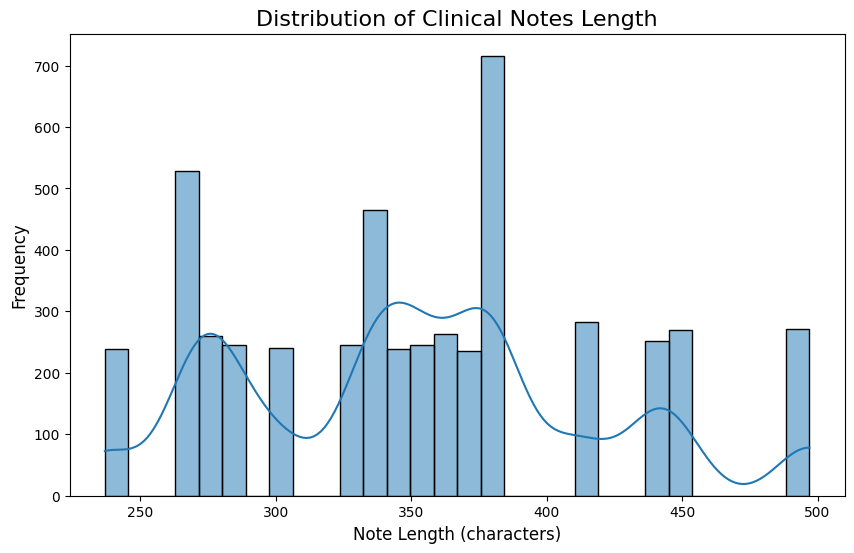

In [ ]:
# Plotting the distribution of Clinical Notes Length
plt.figure(figsize=(10, 6))
sns.histplot(df['Note Length'], bins=30, kde=True)
plt.title('Distribution of Clinical Notes Length', fontsize=16)
plt.xlabel('Note Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-49-90945d6a7337>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.head(20).index, y=diagnosis_counts.head(20).values, palette='viridis')


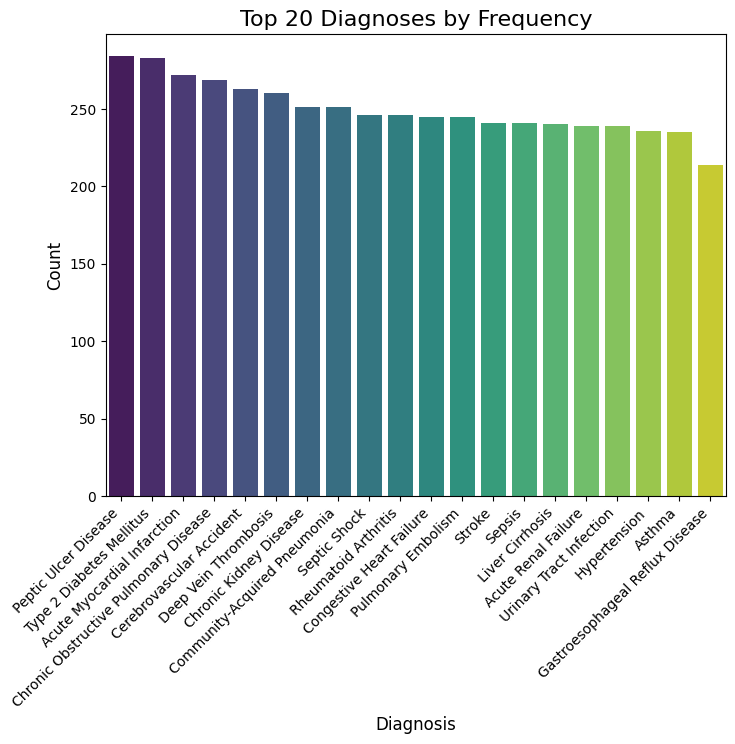

In [ ]:
# Plotting the bar chart for the top 20 diagnoses

diagnosis_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.head(20).index, y=diagnosis_counts.head(20).values, palette='viridis')
plt.title('Top 20 Diagnoses by Frequency', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

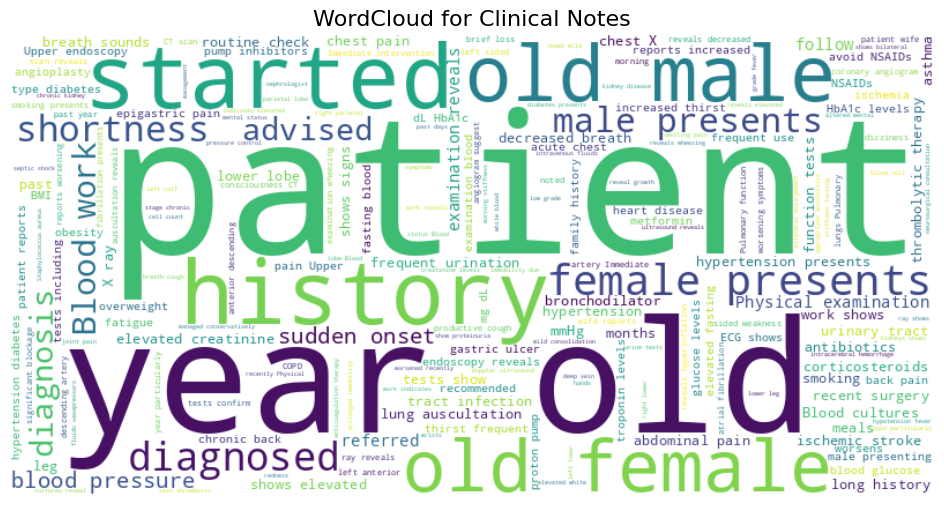

In [ ]:
# Generate WordCloud for Clinical Notes
from wordcloud import WordCloud

text_combined = " ".join(df['Clinical Notes'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Clinical Notes', fontsize=16)
plt.show()

In [ ]:
# Label encoding for 'diagnosis' column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords

# Make sure to download stopwords from nltk
import nltk
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Extended clean_text function with more steps
def clean_text(text):
    # Convert to string and lowercase the text
    text = str(text).lower()

    # Remove any numbers (you may want to modify this if numbers are important)
    text = re.sub(r'\d+', '', text)

    # Remove special characters, punctuation, and non-alphabetical characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply the cleaning function to the Clinical Notes column
df['Clinical Notes'] = df['Clinical Notes'].apply(clean_text)

# Show the cleaned data
df.head()

,Clinical Notes,Diagnosis,Note Length
0,yearold male presents heartburn regurgitation ...,9,337
1,yearold male history heavy alcohol use present...,11,382
2,yearold male history diabetes presents hypoten...,16,285
3,yearold male presents heartburn regurgitation ...,9,337
4,yearold female history obesity hypertension pr...,18,411


# **2. Advance Data Preprocessing**

## **Importing data using Pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
import missingno as msno

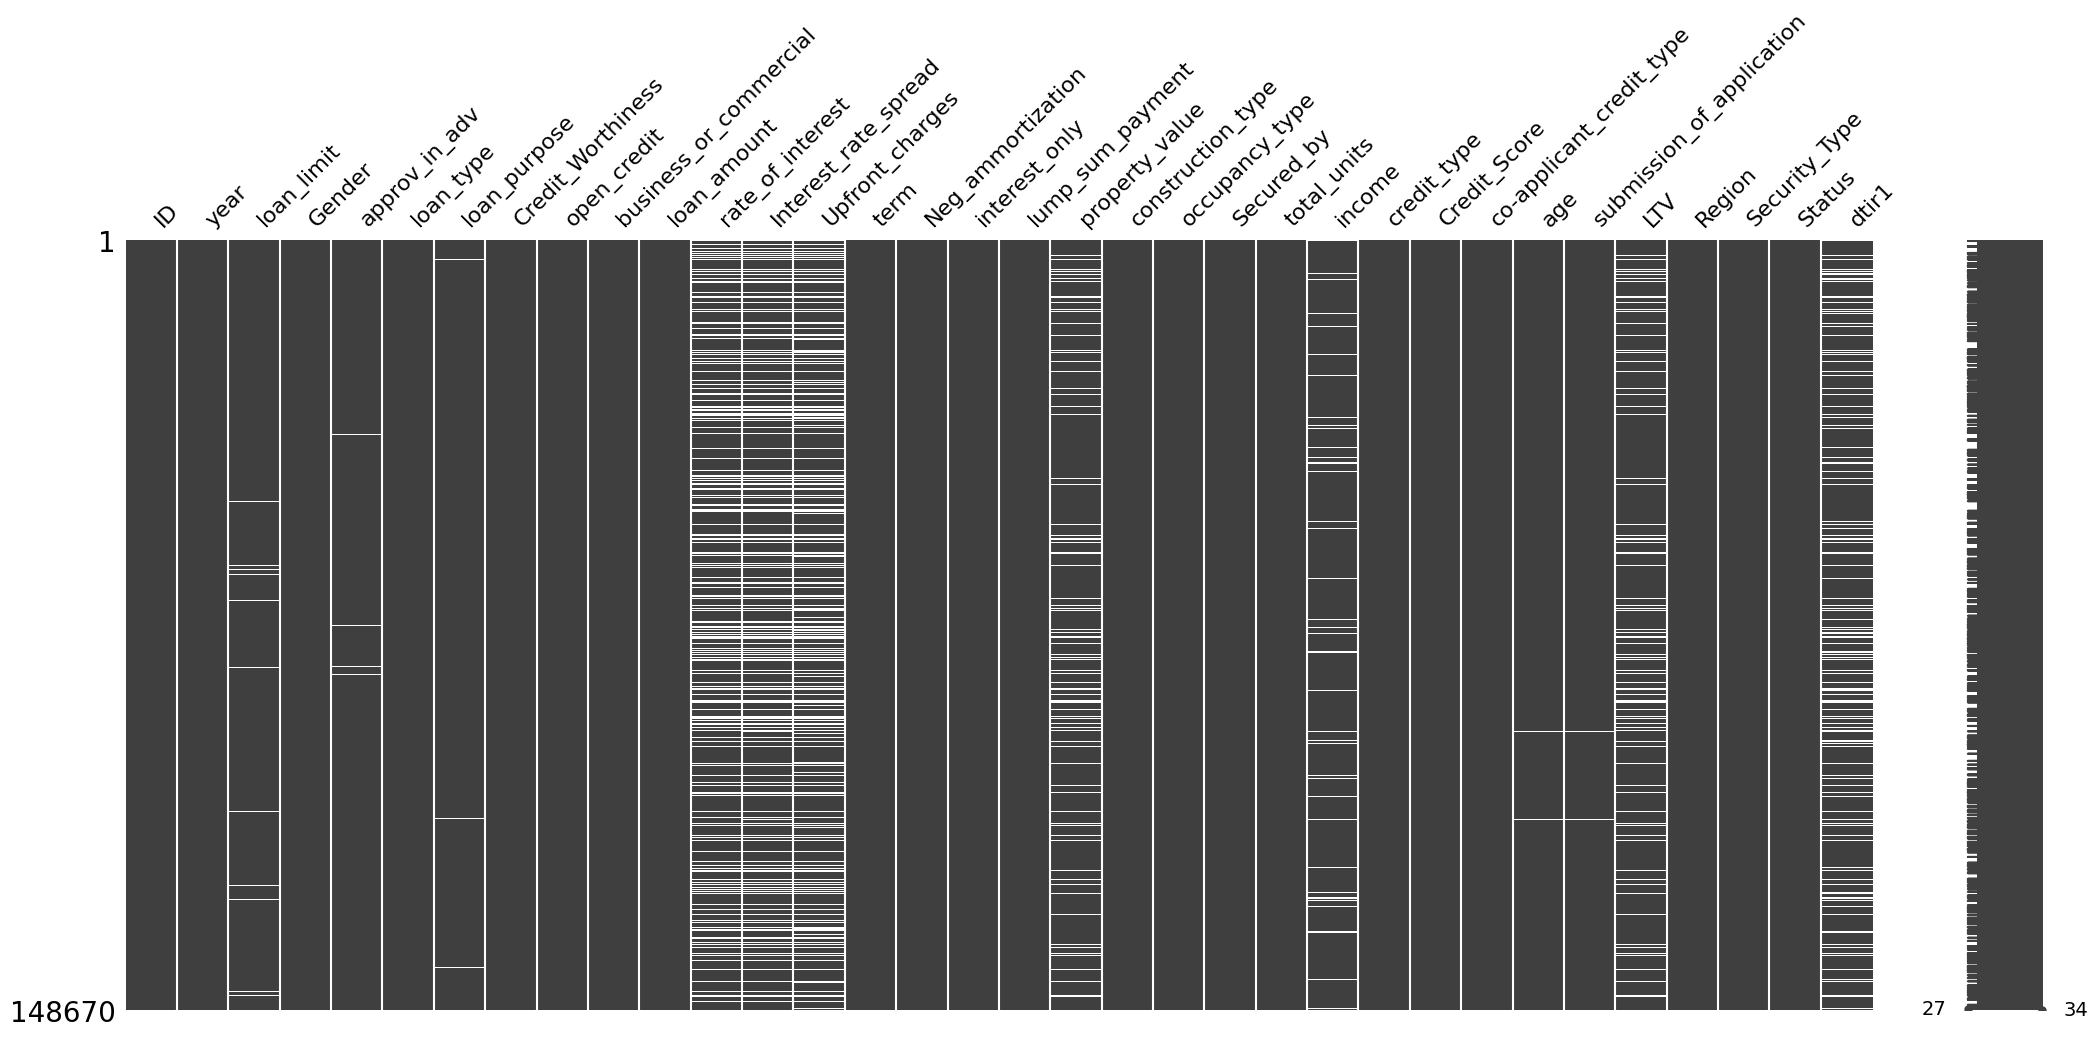

<Figure size 1200x900 with 0 Axes>

In [ ]:
msno.matrix(df)
plt.figure(figsize = (12,9))
plt.show()

<Axes: >

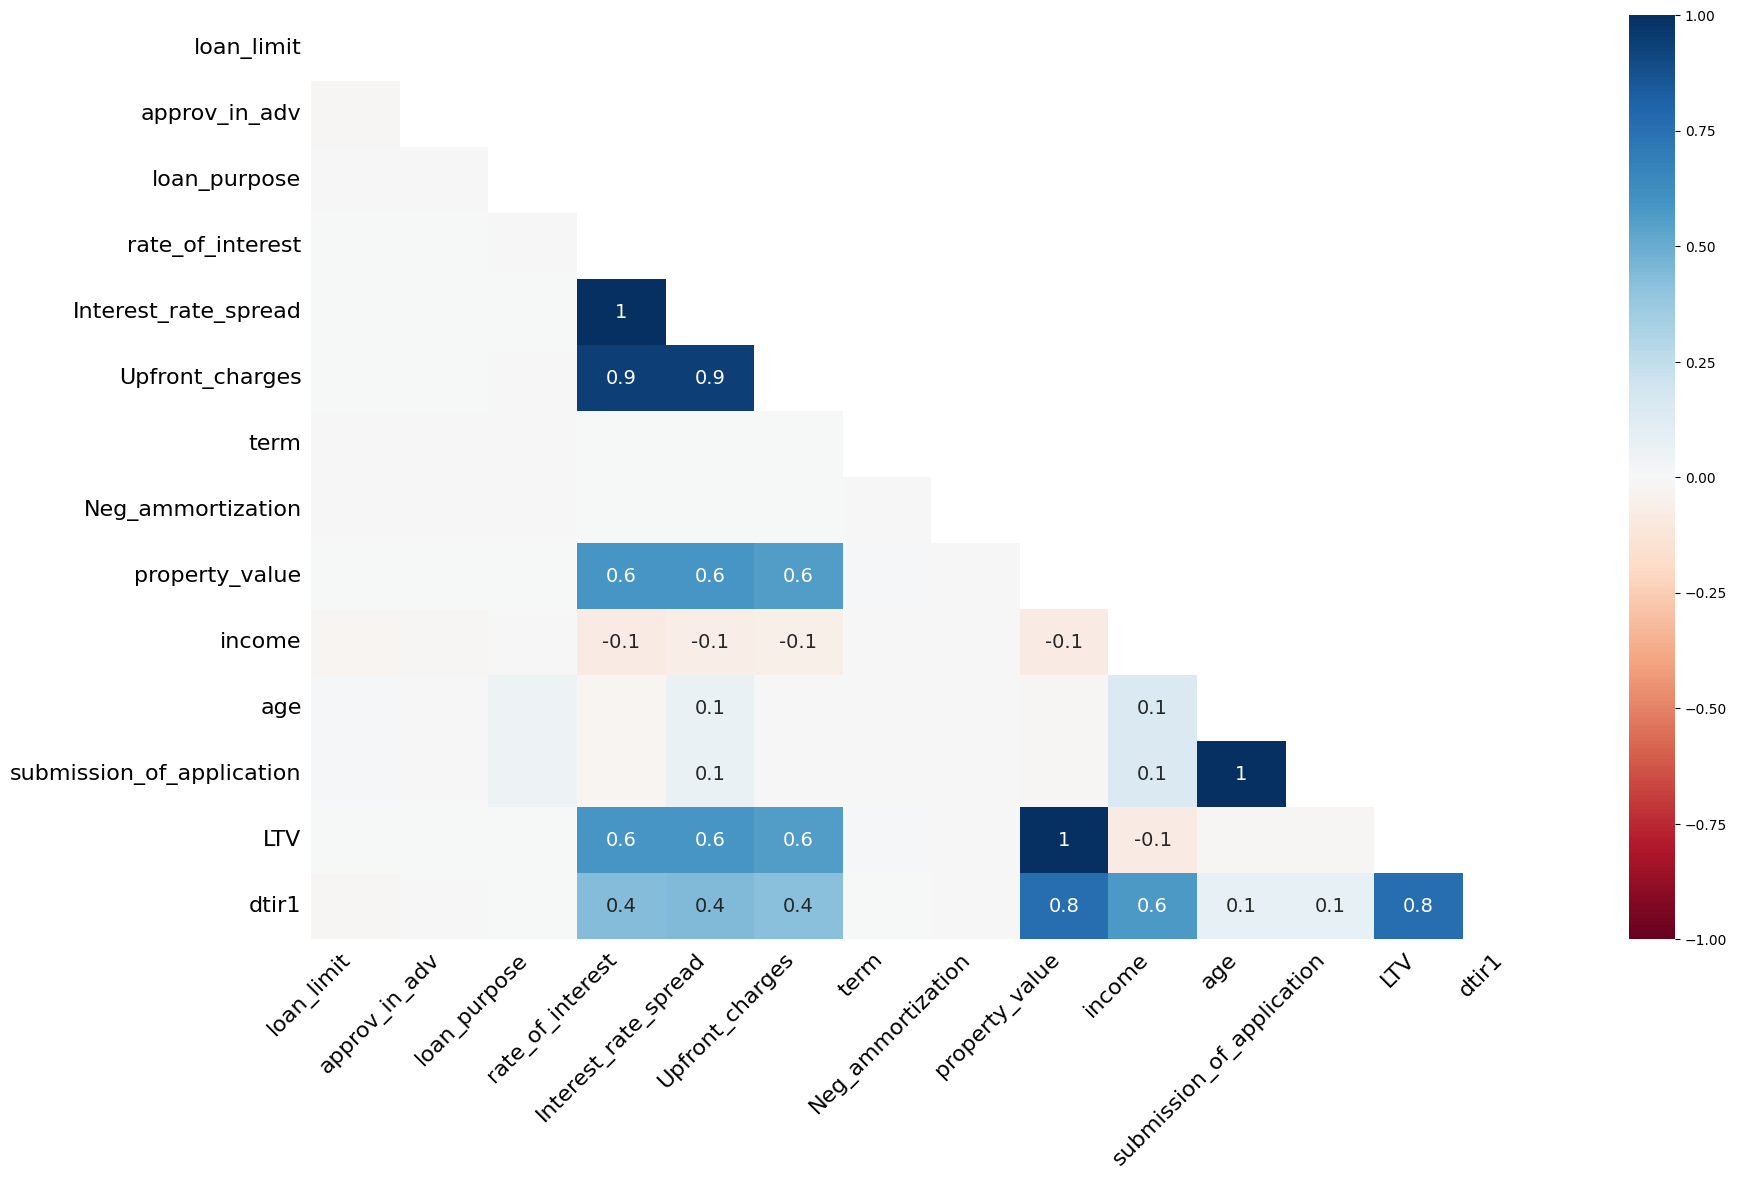

In [ ]:
msno.heatmap(df, labels = True)

In [ ]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<Axes: >

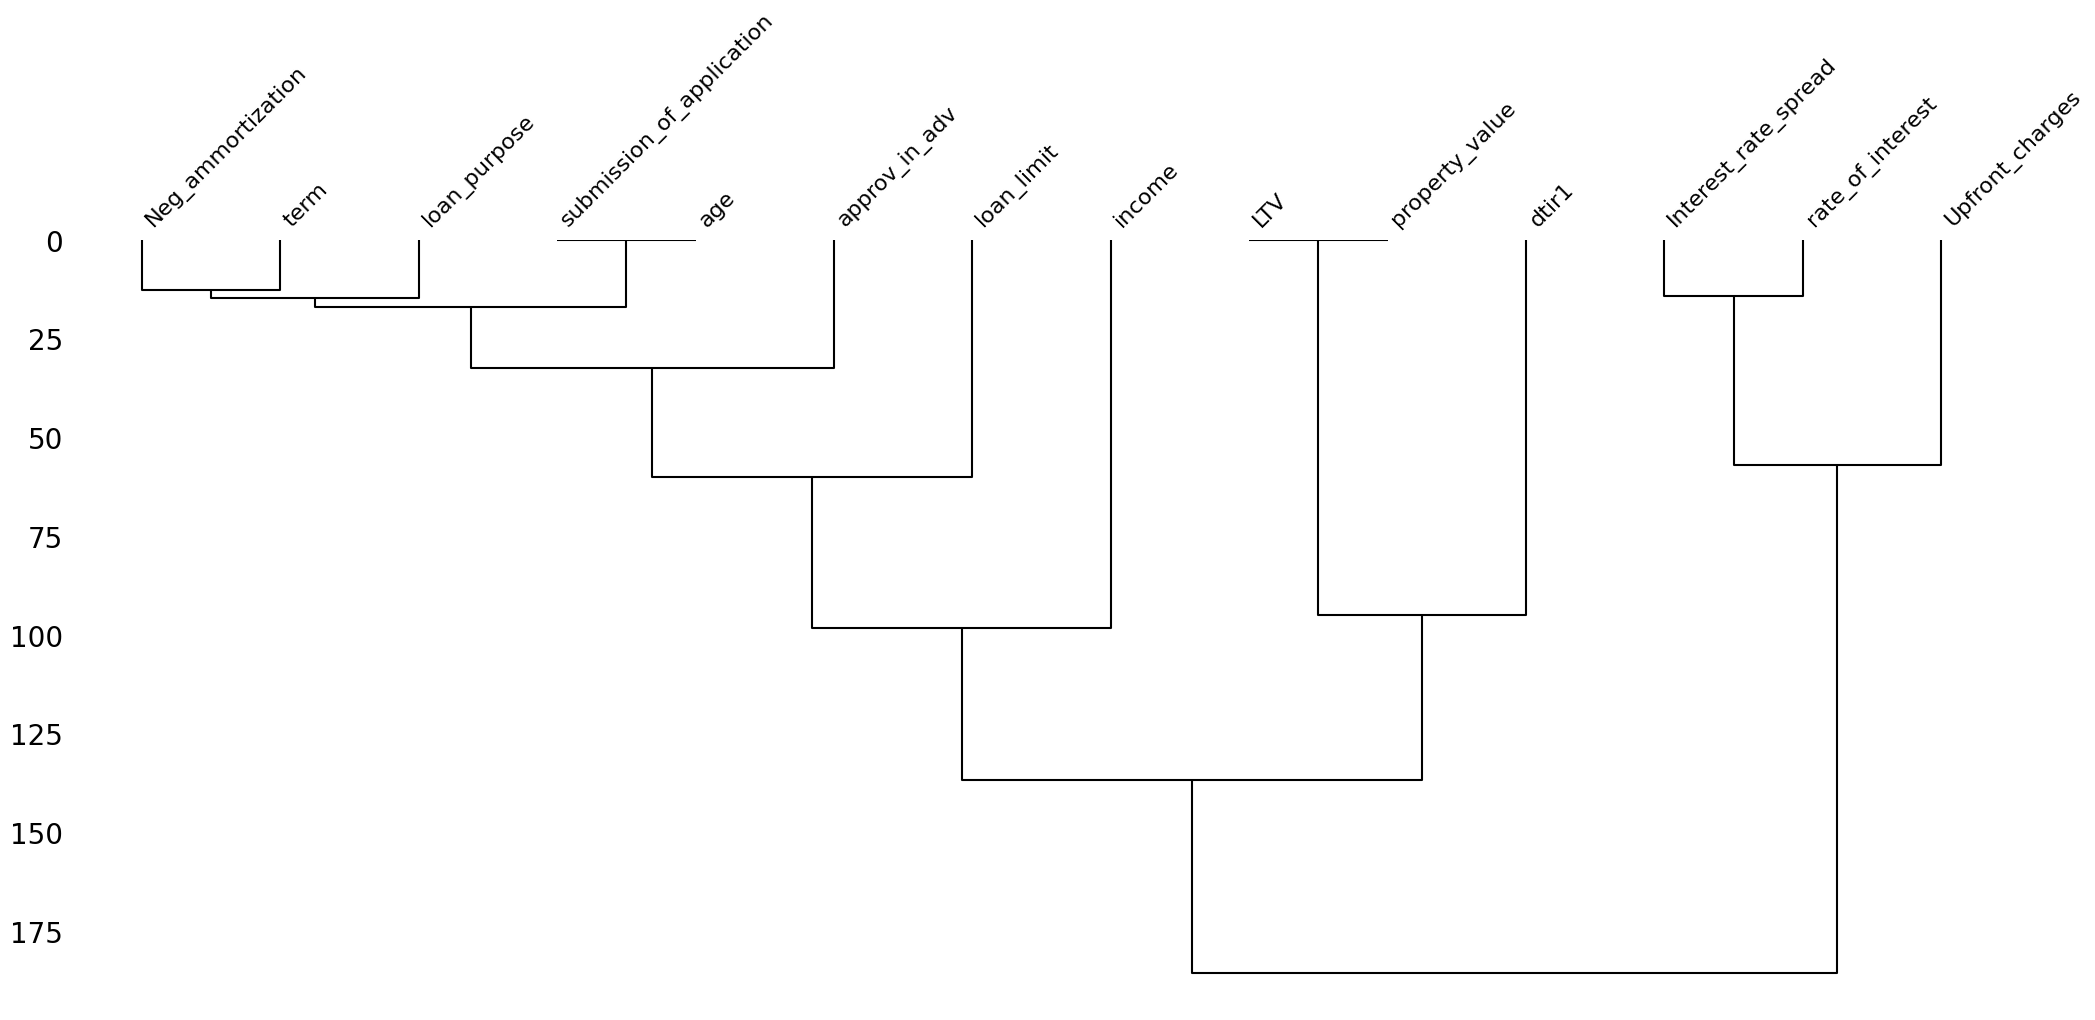

In [ ]:
msno.dendrogram(df[missing_columns])

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
df_temp = df.copy()

In [ ]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

In [ ]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
del df_temp

In [ ]:
df_temp = df.copy()

In [ ]:
# Getting Missing count of each sample

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()

In [ ]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 132360


In [ ]:
del df_temp

In [ ]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [ ]:
df.loan_limit.value_counts()

,count
loan_limit,
cf,135348
ncf,9978


In [ ]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

,count
loan_limit,
cf,135348
ncf,9978
Missing,3344


In [ ]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


In [ ]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

In [ ]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [ ]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [ ]:
X = knn.transform(df_temp)

In [ ]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
del df_temp

In [ ]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

In [ ]:
income = df['income']

In [ ]:
df_temp = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [ ]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

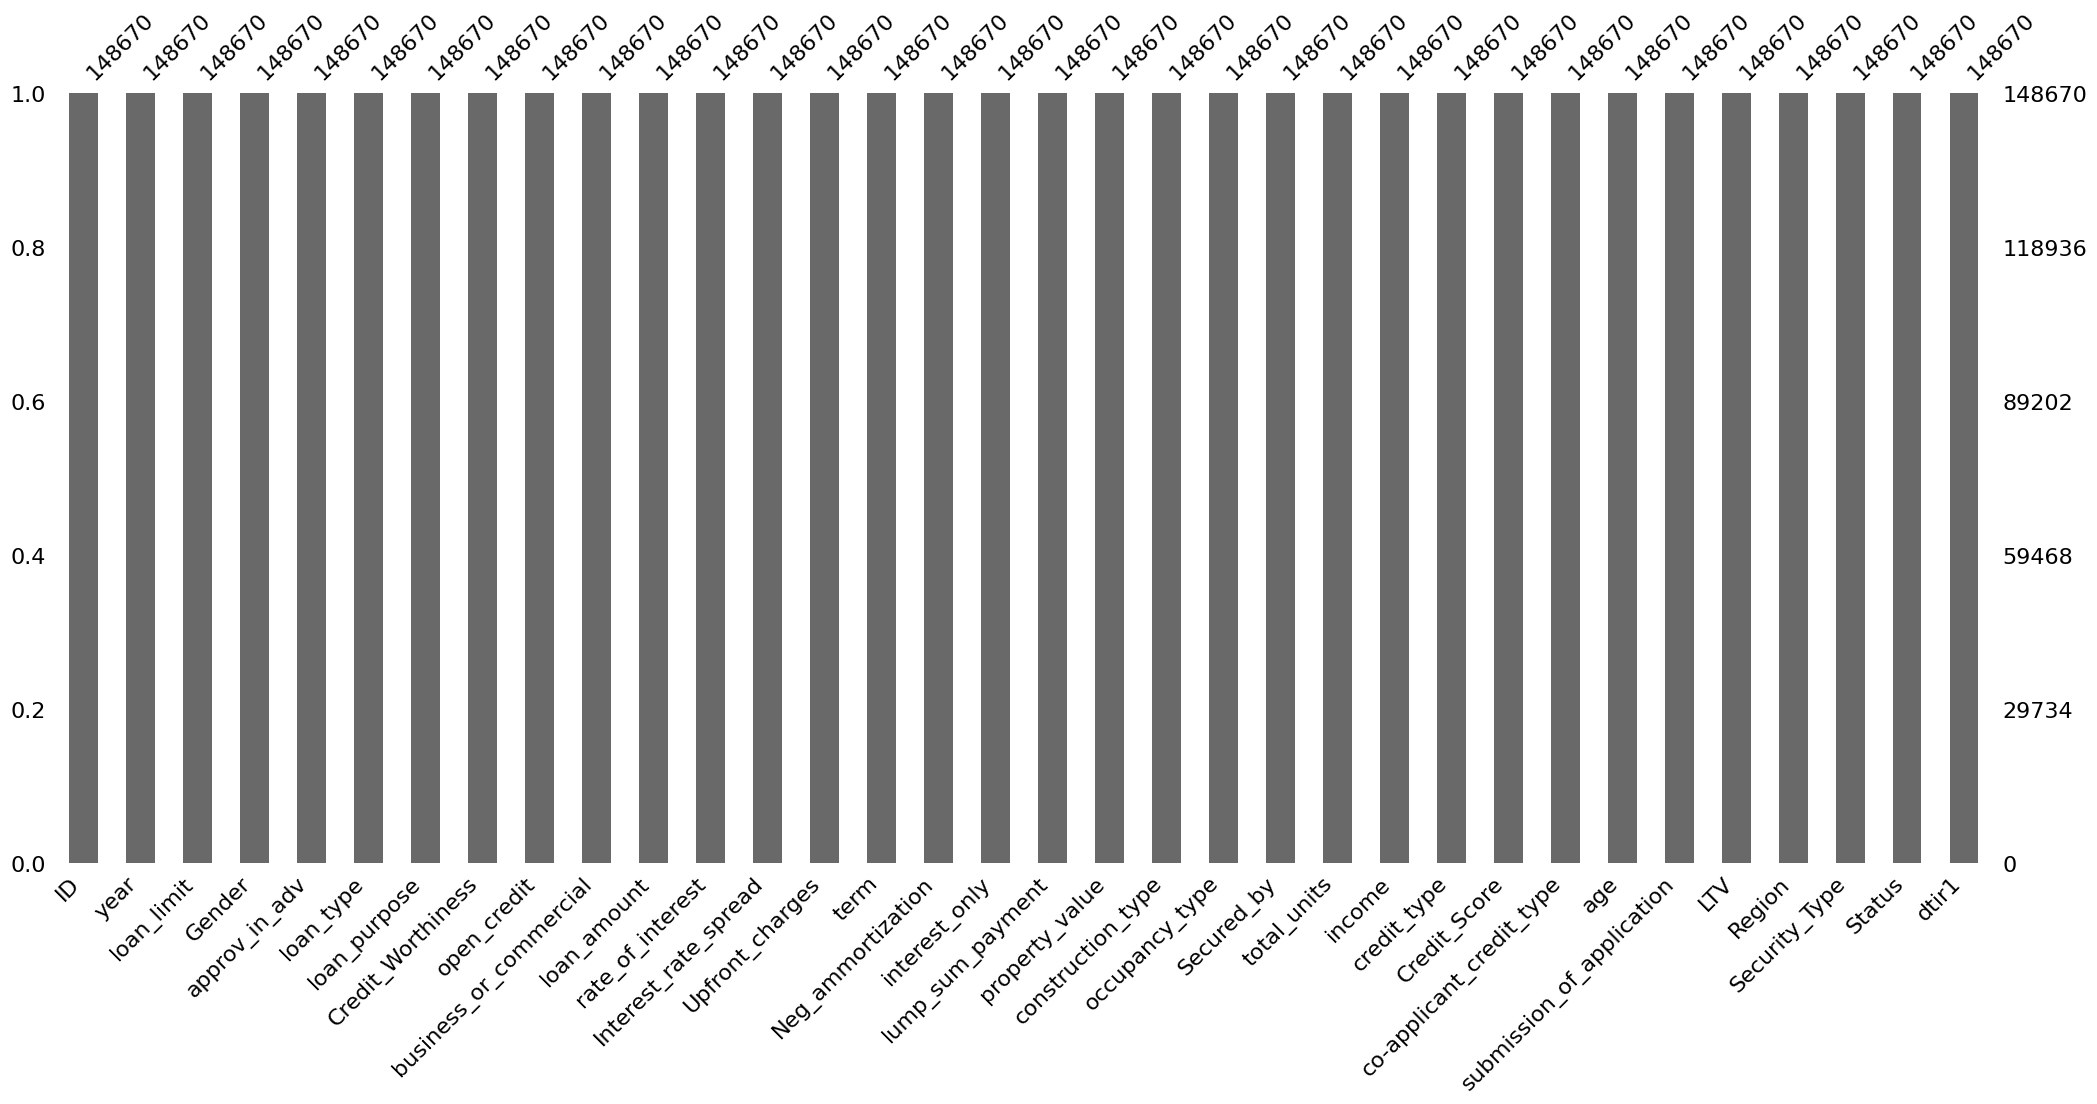

In [ ]:
msno.bar(df_new)
plt.show()

In [ ]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.115125,0.509880,3820.25000,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,3.465625,1.180552,1188.87875,360.0,188500.0,4980.0,552,99.349707,1,40.675
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,4.560000,0.200000,595.00000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,4.250000,0.681000,13016.46000,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.000000,0.304200,0.00000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   Neg_ammortization          148670 non-null  object 
 9   interest_only              148670 non-null  object 
 10  lump_sum_payment           148670 non-null  object 
 11  construction_type          148670 non-null  object 
 12  occupancy_type             148670 non-null  object 
 13  Secured_by                 14

In [ ]:
df_temp = df_new.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)

        for key, value in effect.items():
          effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))

        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp

In [ ]:
df_temp = likelihood_encoding(df_temp, cat_cols)

loan_limit
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.15423628 1.15423628 1.15423628 ... 1.15423628 1.15423628 1.15423628]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


Gender
3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.91559958 1.03689686 1.03689686 ... 1.03689686 1.09245624 1.09245624]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


approv_in_adv
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0
loan_type
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.22116346 0.77528764 1.22116346 ... 1.22116346 1.22116346 1.22116346]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


loan_purpose
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2
0
Credit_Worthiness
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1
open_credit
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1
business_or_commercial
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.20631434 0.77528764 1.20631434 ... 1.20631434 1.20631434 1.20631434]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


Neg_ammortization
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0
interest_only
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0
lump_sum_payment
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0
construction_type
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.11874062 1.11874062 1.11874062 ... 1.11874062 1.11874062 1.11874062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
occupancy_type
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Secured_by
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.11874062 1.11874062 1.11874062 ... 1.11874062 1.11874062 1.11874062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


1
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
total_units
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1
2
3
credit_type
3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.65930987 9.62022984 1.65930987 ... 1.67271291 1.65930987 1.67271291]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


co-applicant_credit_type
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.48733737 0.80788052 1.48733737 ... 0.80788052 0.80788052 1.48733737]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


age
0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

5
7
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
submission_of_application
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.92635447 0.92635447 0.92635447 ... 1.54911915 0.92635447 1.54911915]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
Region
3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.01358977 1.23640901 1.01358977 ... 1.23640901 1.23640901 1.23640901]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


Security_Type
1
0
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-c70dbc6f5786>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.11874062 1.11874062 1.11874062 ... 1.11874062 1.11874062 1.11874062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)


In [ ]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,1.154236,0.915600,1.081488,1.221163,1.052378,1.134793,1.116276,1.206314,1.243843,1.125158,...,4.115125,0.509880,3820.25000,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,1.154236,1.036897,1.081488,0.775288,1.052378,1.134793,1.116276,0.775288,1.243843,1.125158,...,3.465625,1.180552,1188.87875,360.0,188500.0,4980.0,552,99.349707,1,40.675
2,1.154236,1.036897,1.333174,1.221163,1.052378,1.134793,1.116276,1.206314,0.286832,1.125158,...,4.560000,0.200000,595.00000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,1.154236,1.036897,1.081488,1.221163,1.210242,1.134793,1.116276,1.206314,1.243843,1.125158,...,4.250000,0.681000,13016.46000,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,1.154236,1.439649,1.333174,1.221163,1.052378,1.134793,1.116276,1.206314,1.243843,1.125158,...,4.000000,0.304200,0.00000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  float64
 1   Gender                     148670 non-null  float64
 2   approv_in_adv              148670 non-null  float64
 3   loan_type                  148670 non-null  float64
 4   loan_purpose               148670 non-null  float64
 5   Credit_Worthiness          148670 non-null  float64
 6   open_credit                148670 non-null  float64
 7   business_or_commercial     148670 non-null  float64
 8   Neg_ammortization          148670 non-null  float64
 9   interest_only              148670 non-null  float64
 10  lump_sum_payment           148670 non-null  float64
 11  construction_type          148637 non-null  float64
 12  occupancy_type             148670 non-null  float64
 13  Secured_by                 14

In [ ]:
del df_temp

In [ ]:
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [ ]:
df_temp = df_new.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
df_temp = target_encoding(df_temp, cat_cols)

<ipython-input-99-23e43bf795f0>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.23970801 0.23970801 0.23970801 ... 0.23970801 0.23970801 0.23970801]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df.loc[:, col].map(smooth)
<ipython-input-99-23e43bf795f0>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28590775 0.26191376 0.26191376 ... 0.26191376 0.25115528 0.25115528]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df.loc[:, col].map(smooth)
<ipython-input-99-23e43bf795f0>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.25327192 0.25327192 0.20893652 ... 0.25327192 0.25327192 0.25327192]' has dtype incompatible with int64, please explicitly 

In [ ]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,0.239708,0.285908,0.253272,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.115125,0.509880,3820.25000,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,0.239708,0.261914,0.253272,0.345439,0.258768,0.243277,0.246709,0.345439,0.223805,0.245105,...,3.465625,1.180552,1188.87875,360.0,188500.0,4980.0,552,99.349707,1,40.675
2,0.239708,0.261914,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.445965,0.245105,...,4.560000,0.200000,595.00000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,0.239708,0.261914,0.253272,0.227749,0.229749,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.250000,0.681000,13016.46000,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,0.239708,0.191623,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.000000,0.304200,0.00000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [ ]:
df['age'].value_counts()

,count
age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337
Missing,200


# **3. Data Preprocessing For Machine Learning**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)

In [ ]:
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Data-Cleaning

In [ ]:
# Remove duplicates
print(f'Shape of Loan Dataset before drop duplicated Row is: {df.shape}')
loan_dataset = df.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {loan_dataset.shape}')

Shape of Loan Dataset before drop duplicated Row is: (614, 13)
Shape of Loan Dataset After Drop Duplicated Row is: (614, 13)


In [ ]:
# Drop Unecessary Variables
loan_dataset = df.drop("Loan_ID", axis=1)

In [ ]:
# Categorical and Continuous Features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
# Splitting Data into Train, Validation, and Test Sets
X = loan_dataset.drop(columns='Loan_Status')
Y = loan_dataset['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [ ]:
# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y, shuffle=True, random_state = 40)
# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state = 40)

# **Plotting**

In [ ]:
class Plotter:

    def __init__(self, X, y):
        self.x_train = X
        self.y_train = y
        self.fig, self.axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

    def Plot_Box(self, row, col, x):
        ax = self.axes[row, col]
        sns.boxplot(data=self.x_train, x=x, y=self.y_train, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. Loan_Status ")

    def Show_Plots(self):
        plt.tight_layout()
        plt.show()

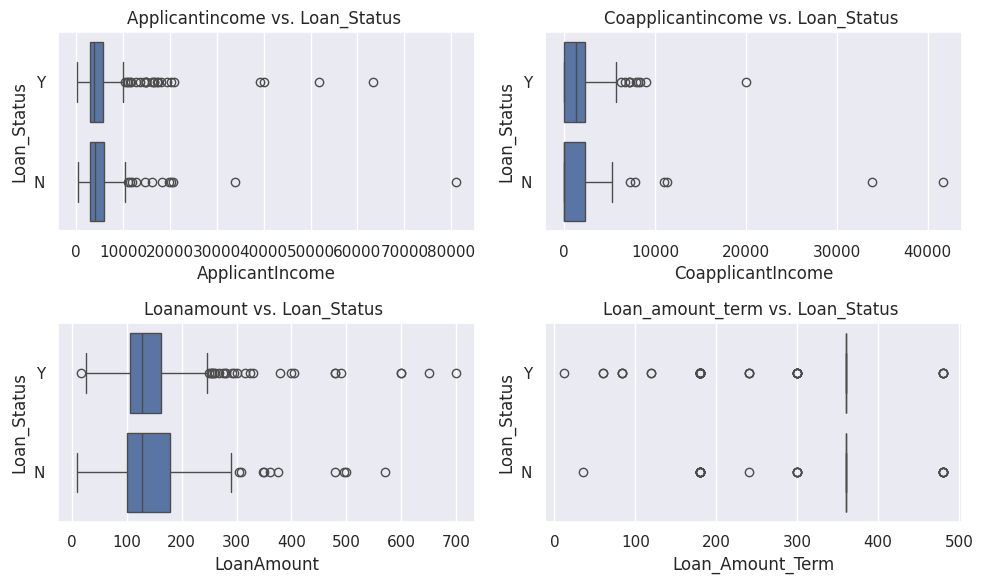

In [ ]:
plot_continuous_features = Plotter(X_train, y_train)
# Plot the box plots
for i, col in enumerate(continuous_features):
    plot_continuous_features.Plot_Box(i // 2, i % 2, x=col)

plot_continuous_features.Show_Plots()

In [ ]:
# Missing Value Analysis
def calculate_missing_values(X_train, X_val, X_test):
    Miss_Train = X_train.isna().sum()
    Miss_Val = X_val.isna().sum()
    Miss_test = X_test.isna().sum()

    # Convert the series to dataframes
    output_train = pd.DataFrame(Miss_Train, columns=['Missing Values X_train'])
    output_val = pd.DataFrame(Miss_Val, columns=['Missing Values X_val'])
    output_test = pd.DataFrame(Miss_test, columns=['Missing Values X_test'])


    # Concatenate the dataframes output_train and output_val
    output = pd.concat([output_train, output_val,output_test], axis=1, join='inner')

    return output

output = calculate_missing_values(X_train, X_val, X_test)

In [ ]:
# Define a function to apply the desired styling
def color_cell(value):
    if value >=20 :
        return 'background-color:#2e9ee8'
    elif value >=10 and value <20 :
        return 'background-color:#7ac1f0'
    elif value >=1 and value <10 :
        return 'background-color:#bdddf2'
    return ''

# Apply the styling to the DataFrame
styled_df = output.style.applymap(color_cell)

styled_df

<ipython-input-61-2cd57bb1c085>:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = output.style.applymap(color_cell)


,Missing Values X_train,Missing Values X_val,Missing Values X_test
Gender,6,4,3
Married,2,0,1
Dependents,11,2,2
Education,0,0,0
Self_Employed,29,2,1
ApplicantIncome,0,0,0
CoapplicantIncome,0,0,0
LoanAmount,21,1,0
Loan_Amount_Term,12,0,2
Credit_History,42,4,4


# **Missing values handling**

In [ ]:
#Continuous feature
def calculate_mean(df, column):
    mean = df[column].mean().round()
    return mean

for col in ["LoanAmount","Loan_Amount_Term"]:
    print(f'Mean {col} in Trainset is: {calculate_mean(X_train, col)}')
    print(f'Mean {col} in Valset is: {calculate_mean(X_val, col)}')
    print(f'Mean {col} in Testset is: {calculate_mean(X_test, col)}')

Mean LoanAmount in Trainset is: 148.0
Mean LoanAmount in Valset is: 140.0
Mean LoanAmount in Testset is: 140.0
Mean Loan_Amount_Term in Trainset is: 341.0
Mean Loan_Amount_Term in Valset is: 346.0
Mean Loan_Amount_Term in Testset is: 346.0


In [ ]:
def fill_missing_values_by_mean(df, column):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

cols = ["LoanAmount","Loan_Amount_Term"]
X_train = fill_missing_values_by_mean(X_train, cols)
X_val = fill_missing_values_by_mean(X_val, cols)
X_test = fill_missing_values_by_mean(X_test, cols)

<ipython-input-63-7dd7edd4872e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
#Categorical Features
Isna_cate = ['Gender', 'Married','Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Credit_History']
# Most frequent value for each categorical feature
def Get_Mode(df, cols):
    list_of_most_frequent = {}
    for col in cols:
        f = df[col].mode().iloc[0]
        list_of_most_frequent[col] = f
    return pd.DataFrame(list_of_most_frequent, index=['Most Frequent'])

In [ ]:
# Most frequent value for each categorical feature in X_train
Get_Mode(X_train, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


In [ ]:
# Most frequent value for each categorical feature in X_Val
Get_Mode(X_val, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


In [ ]:
# Most frequent value for each categorical feature in X_test
Get_Mode(X_test, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


# **Categorical feature**

In [ ]:
#Handling Missing Values in Categorical Features

def Fill_Null(df,cols):

    for col in cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

X_train = Fill_Null(X_train, Isna_cate)
X_val = Fill_Null(X_val, Isna_cate)
X_test = Fill_Null(X_test, Isna_cate)

<ipython-input-69-7ab09843d659>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Changing the data type of Credit_History to int using astype()
for df in [X_train, X_val, X_test]:
    df['Credit_History'] = df['Credit_History'].astype(int)

In [ ]:
X_train.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
X_test.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# **Feature Engineering**

In [ ]:
Nominal_fetaures = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']

In [ ]:
# Encoding Categorical Features
def encode_categorical_features(df, cols):

    for col in cols:
        dummies = pd.get_dummies(df[col], dtype=int, prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(labels=col, axis=1)
    return df

# Encode the categorical features in the training and test sets
X_train = encode_categorical_features(X_train, Nominal_fetaures)
X_val = encode_categorical_features(X_val, Nominal_fetaures )
X_test = encode_categorical_features(X_test, Nominal_fetaures )

In [ ]:
# Encoding Categorical Features
encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
for df in [X_train, X_val, X_test]:
    df["Dependents"] = df['Dependents'].map(encoder)

In [ ]:
X_train.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
101,0.25,4843,3806.0,151.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
116,0.25,3167,2283.0,154.0,360.0,1,1,0,0,1,1,0,1,0,0,1,0
191,0.25,12000,0.0,164.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
237,0.25,3463,0.0,122.0,360.0,1,1,0,1,0,1,0,0,1,0,0,1
222,0.25,2971,2791.0,144.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0


# **Balancing TrainSet**

In [ ]:
# Convet target column to int
mapping = {'Y': 1,'N': 0}
y_train = pd.Series(y_train).map(mapping)
y_val = pd.Series(y_val).map(mapping)
y_test = pd.Series(y_test).map(mapping)

<ipython-input-78-42956b1ac200>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, data=X_train, palette='hls')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. Fro

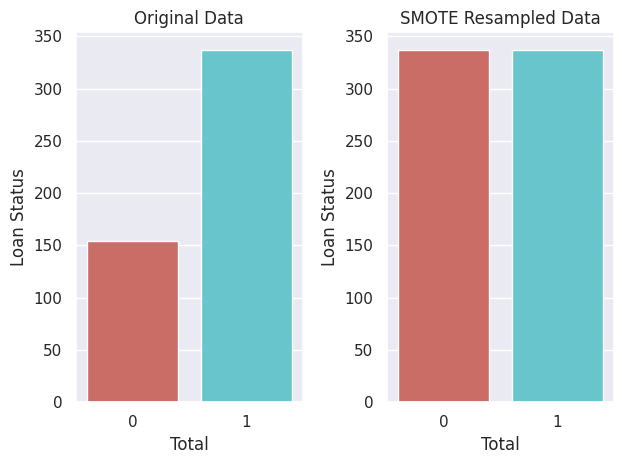

In [ ]:
# Using SMOTE Technique  to Balancing TrainSet
# First figure
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Original Data')

# Second figure
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('SMOTE Resampled Data')

# Adjust the layout and display the figures
plt.tight_layout()
plt.show()

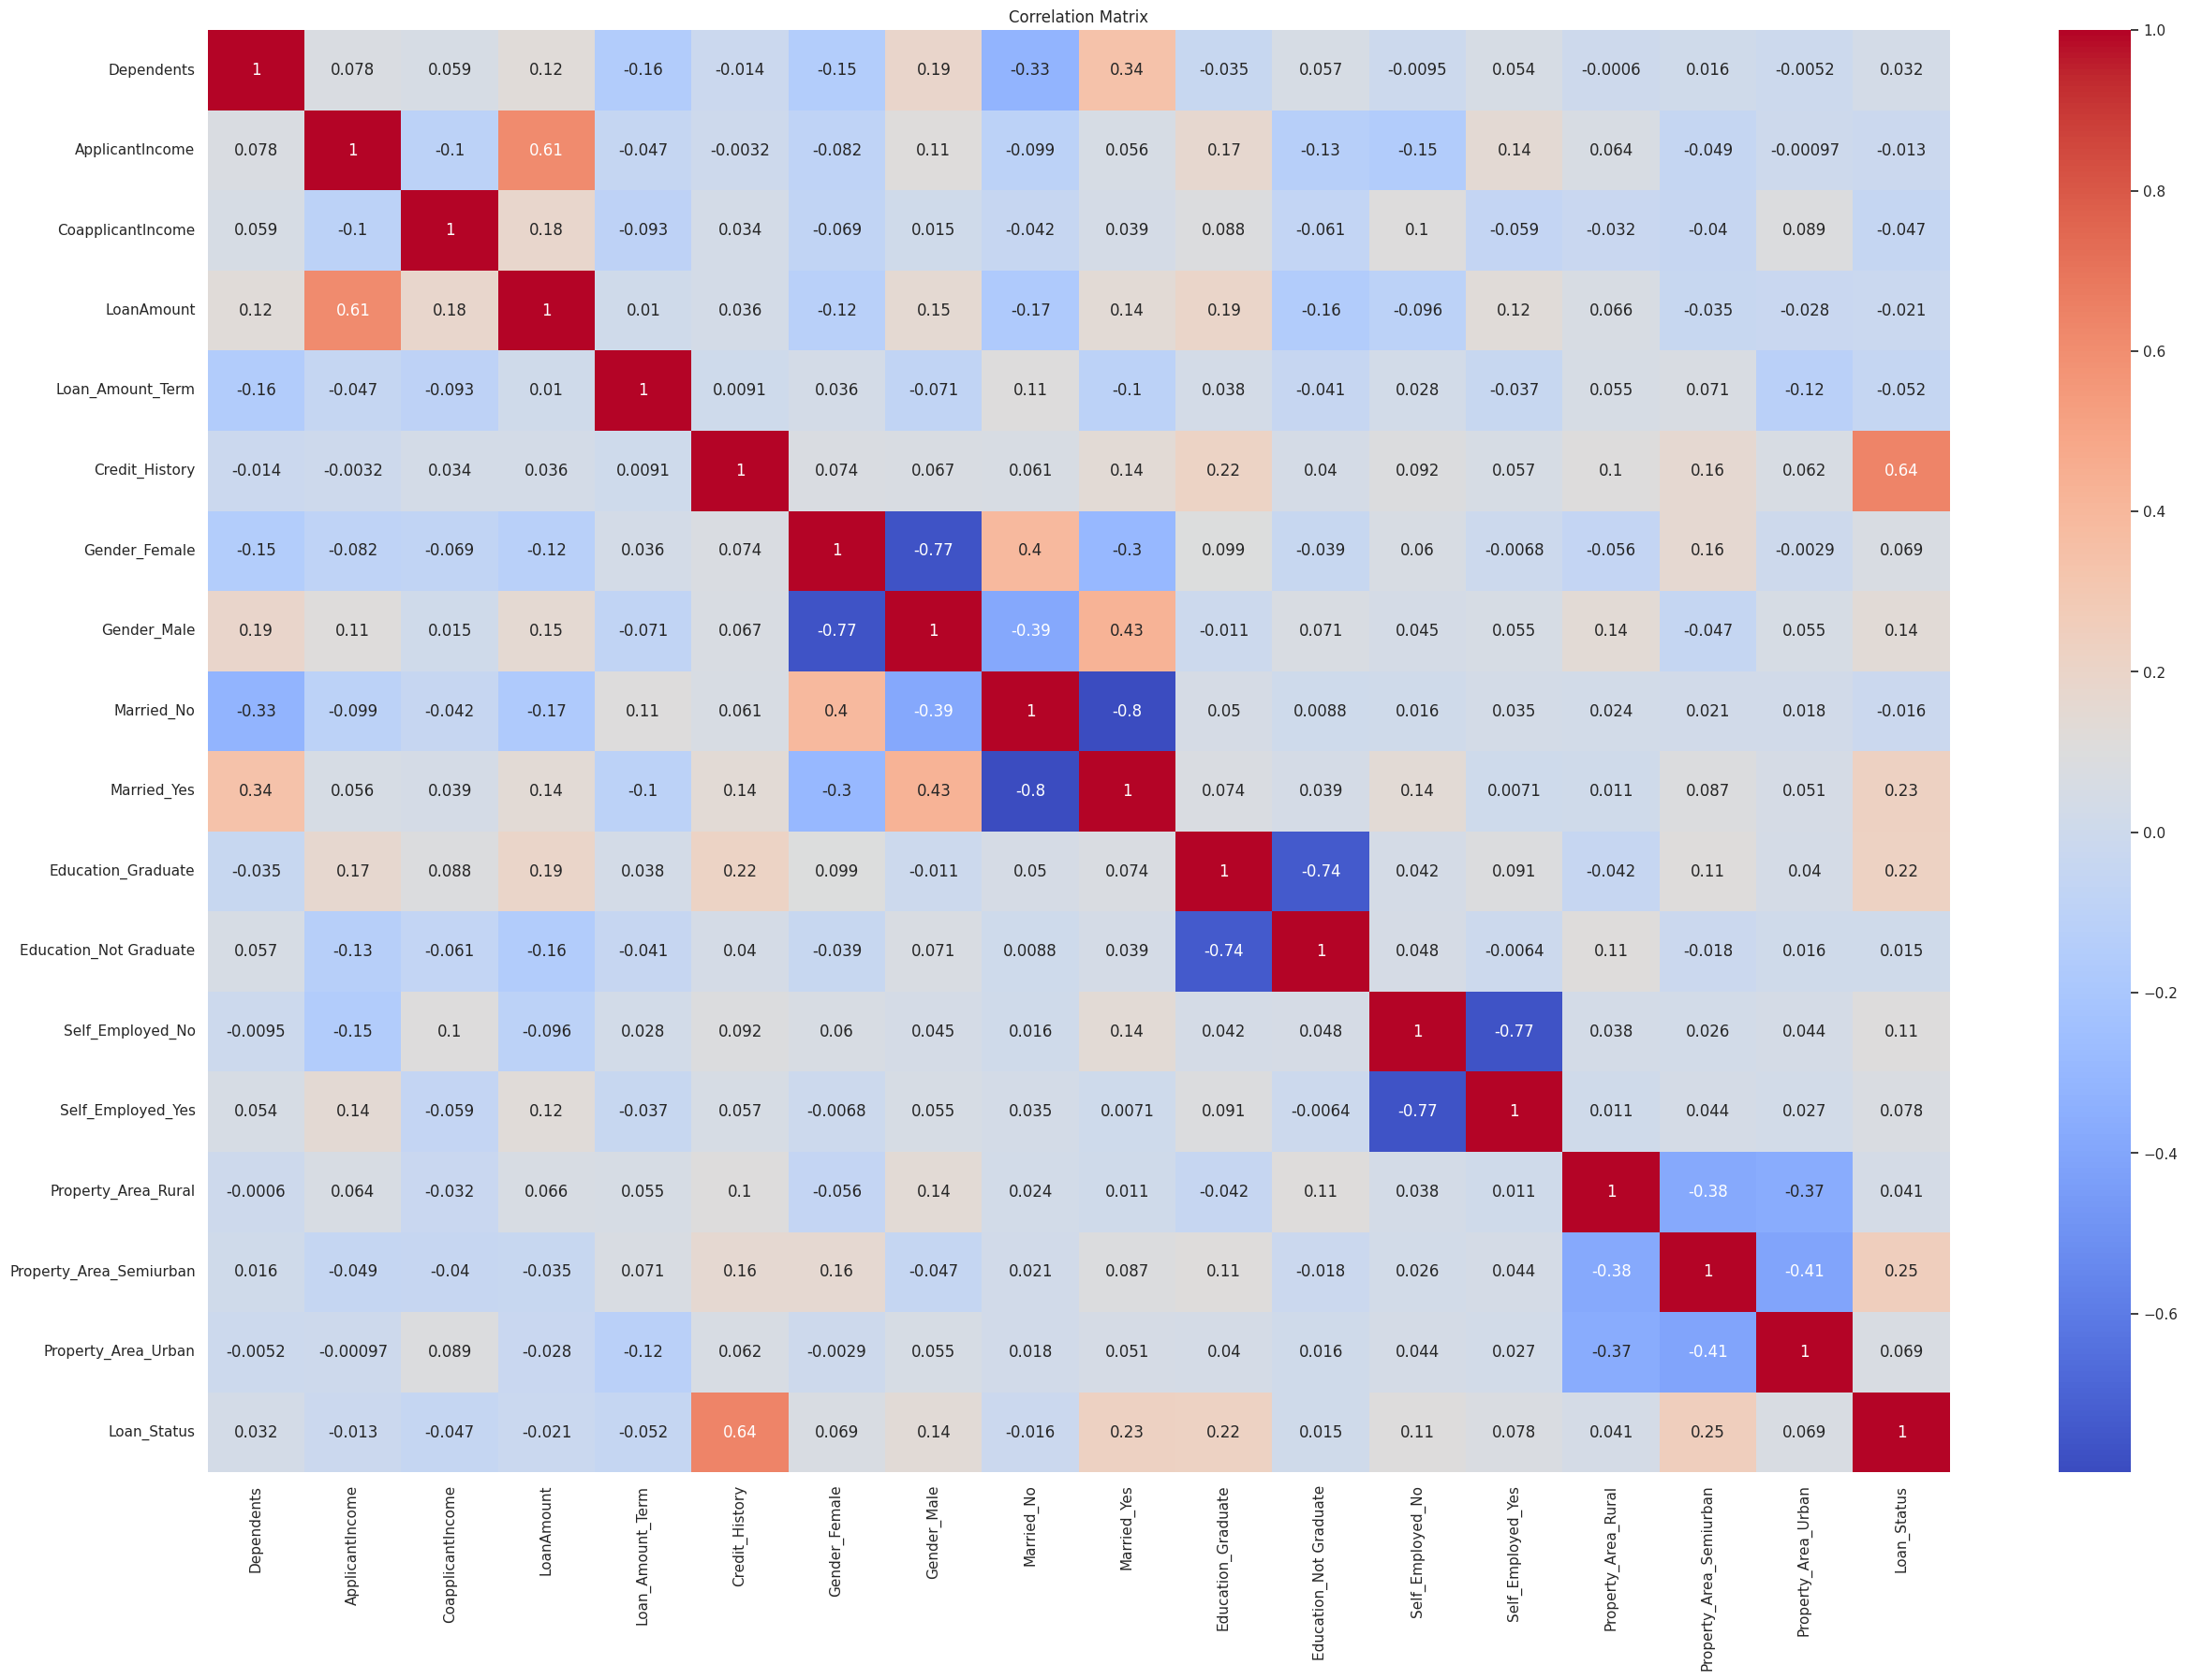

In [ ]:
# Correlation Analysis
train_copy = pd.concat([X_train, y_train], axis=1)
corr_matrix =train_copy.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

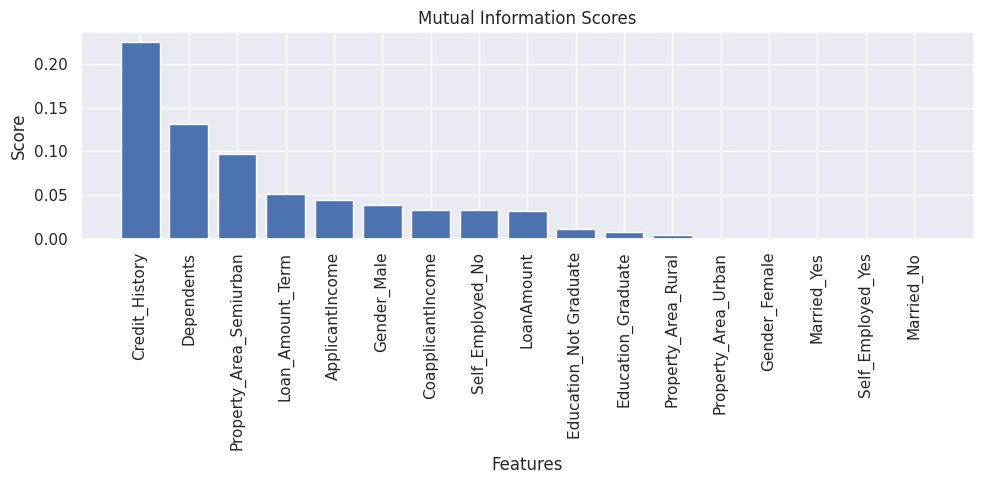

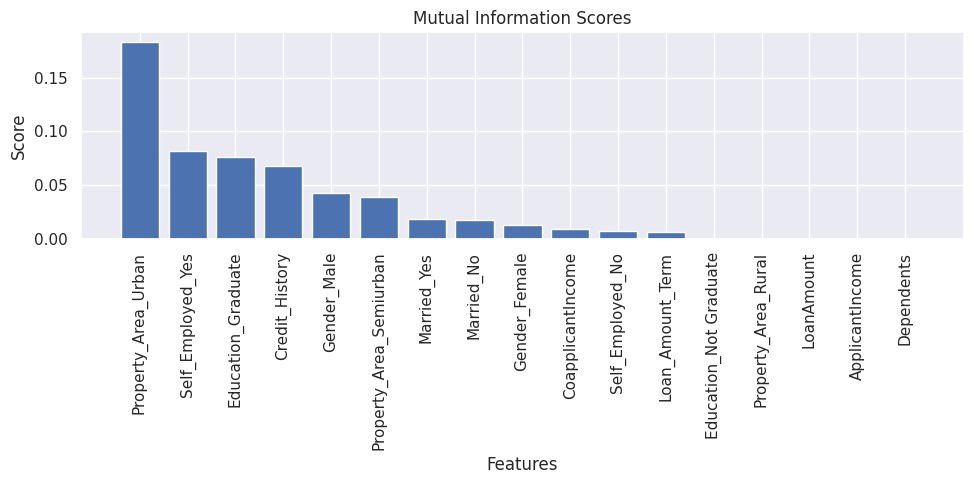

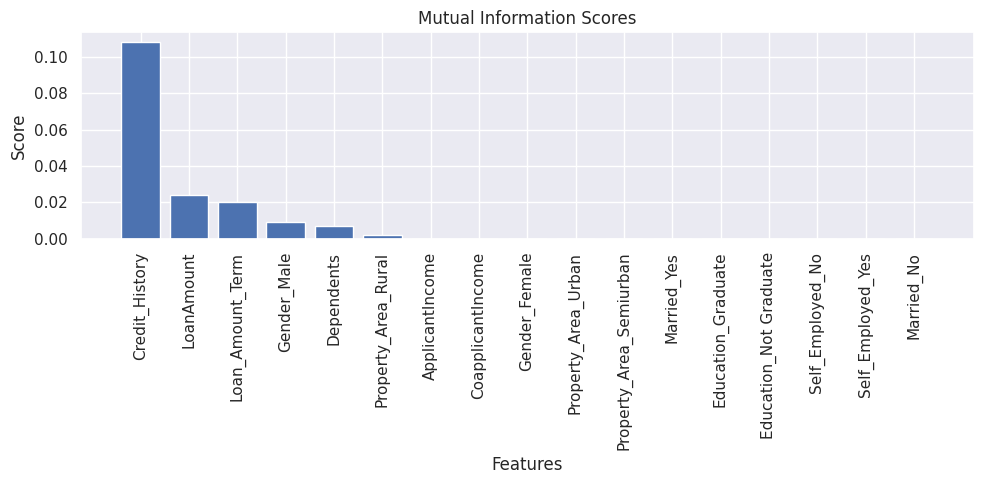

In [ ]:
# Mutual Information
for X, y in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    feature_names = X.columns
    scores = mutual_info_classif(X, y)

    # Create an array of indices for sorting the scores and feature names
    indices = np.argsort(scores)[::-1]

    # Sort the scores and feature names based on the indices
    sorted_scores = scores[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(sorted_scores)), sorted_scores)
    plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')
    plt.title("Mutual Information Scores")
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()